# Image classifier using Tensorflow Sequential API

For this problem the input is images of resolution 28 * 28 and output will be an index of 10. 
There are 70000 images in this fanish minist datasets

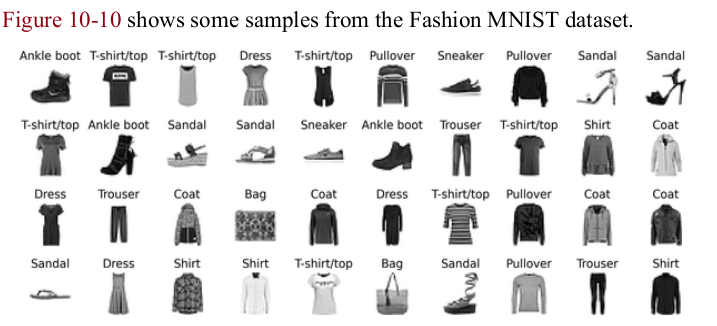

If tensorflow is not installed, use this command to install it 
`pip install tensorflow`

In [2]:
import tensorflow as tf

/home/james/HDD/OneDrive/Cloud/tutorials/.conda/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Load the data and split it into traning, validation and testing data sets

In [3]:
fashion_data = tf.keras.datasets.fashion_mnist.load_data()

(x_train_full, y_train_full), (x_test, y_test) = fashion_data
x_train , y_train = x_train_full[:-5000] , y_train_full[:-5000]
x_valid , y_valid = x_train_full[-5000:] , y_train_full[-5000:]

Changing the resolution from 255 b/w 0 and 1

In [4]:
x_train , x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
x_train_full = x_train_full / 255.0

Output labels

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train_full[0]]

'Ankle boot'

### Model training and evaluvation

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

/home/james/HDD/OneDrive/Cloud/tutorials/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Getting details about the model layers and weights

In [7]:
print(model.layers[0])
hidden_layer_1 = model.layers[1]
hidden_layer_1.get_weights()

<Flatten name=flatten, built=True>


[array([[-0.07039732, -0.04888947, -0.05840396, ..., -0.03165691,
         -0.02755306, -0.02338126],
        [-0.04726042, -0.02854562, -0.06249516, ..., -0.05896368,
         -0.06232342,  0.06228128],
        [ 0.00852247, -0.06307948, -0.05711976, ...,  0.01807883,
         -0.01294006, -0.00987513],
        ...,
        [-0.05313968, -0.04454197,  0.07316259, ...,  0.00532554,
          0.04894575,  0.02493655],
        [ 0.06633578, -0.04153943, -0.01754093, ..., -0.05369355,
          0.02870391,  0.05745098],
        [ 0.06162934, -0.0397489 , -0.02827245, ..., -0.01727207,
          0.02802327,  0.01257871]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Compling the model
* if it is multi class classfication problem with index 0 - 9 `sparse_categorical_crossentropy` is used
* if it is one hot like [1,0,....0] then `categorical_crossentropy` will be used
* if it is binary classfication probelem then `binary_crossentropy` will be used

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Training the model

if required we can pass the `validation_split` parameter tells keras to use the last 10% data for validation. 

model.fit(x_train_full, y_train_full, epochs=30, validation_split=0.1)

The history returned by the fit method contains the loss and metrics values in each iteration

In [9]:
history = model.fit(x_train_full, y_train_full, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


2024-07-04 16:05:24.502500: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6951 - loss: 0.9589 - val_accuracy: 0.8270 - val_loss: 0.4997
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8297 - loss: 0.4931 - val_accuracy: 0.8354 - val_loss: 0.4521
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8443 - loss: 0.4464 - val_accuracy: 0.8470 - val_loss: 0.4195
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8550 - loss: 0.4118 - val_accuracy: 0.8600 - val_loss: 0.3929
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8616 - loss: 0.3953 - val_accuracy: 0.8650 - val_loss: 0.3706
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8670 - loss: 0.3818 - val_accuracy: 0.8688 - val_loss: 0.3551
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8729 - loss: 0.3618 - val_accuracy: 0.8742 - val_loss: 0.3397
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8768 - loss: 0.3515 - val_accurac

Plotting the train and validation accurancy and loss values 

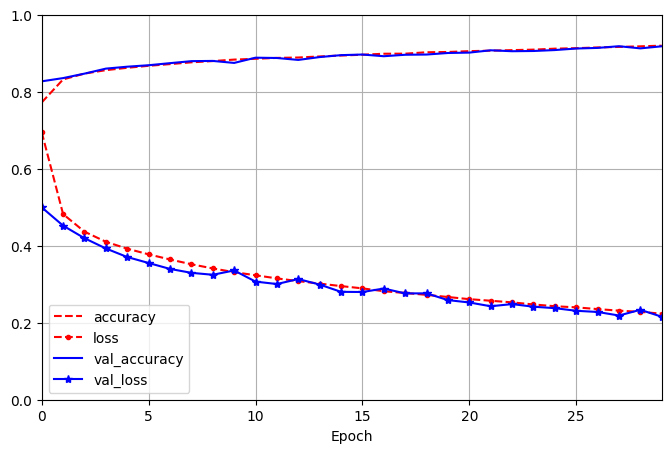

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

Evaluvating the model on the test data

In [11]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.3235


[0.31952232122421265, 0.8863000273704529]

### Model prediction

In [12]:
y_pred = model.predict(x_test[:3])
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

printing the output class names

In [13]:
import numpy as np
predicted = np.array(class_names)[y_pred.argmax(axis=1)]
actual_output = np.array(class_names)[y_test[:3]]

print(f'Predicted Output: {predicted}')
print(f'Actual_output : {actual_output}')


Predicted Output: ['Ankle boot' 'Pullover' 'Trouser']
Actual_output : ['Ankle boot' 'Pullover' 'Trouser']
